## Importing the Modules

In [29]:
#import the libraries
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
import warnings
from IPython.display import display,HTML 

warnings.filterwarnings('ignore')

## Loading the Dataset

In [30]:
df = pd.read_csv('train.csv')
df.head()
  

,id,label,tweet
0,1,1,@user when a father is dysfunctional and is s...
1,2,1,@user @user thanks for #lyft credit i can't us...
2,3,1,bihday your majesty
3,4,1,#model i love u take with u all the time in ...
4,5,1,factsguide: society now #motivation


In [28]:
df['label'] = df['label'].apply(lambda x:0 if x == 1 else 1)
print(df)

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]


In [31]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


## Preprocessing Data

In [32]:
values_list=list()
cols_list=list()
for col in df.columns:
    missing=df[col].isnull()
    cols_list.append(col)
    values_list.append(missing)
missing_df = pd.DataFrame()
missing_df['col'] = cols_list
missing_df['missing'] = values_list
display(HTML(missing_df.to_html()))

df=df.dropna(how='any',axis=0)
df.shape
print(df)



,col,missing
0,id,"0 False 1 False 2 False 3 False 4 False ... 31957 False 31958 False 31959 False 31960 False 31961 False Name: id, Length: 31962, dtype: bool"
1,label,"0 False 1 False 2 False 3 False 4 False ... 31957 False 31958 False 31959 False 31960 False 31961 False Name: label, Length: 31962, dtype: bool"
2,tweet,"0 False 1 False 2 False 3 False 4 False ... 31957 False 31958 False 31959 False 31960 False 31961 False Name: tweet, Length: 31962, dtype: bool"


          id  label                                              tweet
0          1      1   @user when a father is dysfunctional and is s...
1          2      1  @user @user thanks for #lyft credit i can't us...
2          3      1                                bihday your majesty
3          4      1  #model   i love u take with u all the time in ...
4          5      1             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      1  ate @user isz that youuu?ðððððð...
31958  31959      1    to see nina turner on the airwaves trying to...
31959  31960      1  listening to sad songs on a monday morning otw...
31960  31961      0  @user #sikh #temple vandalised in in #calgary,...
31961  31962      1                   thank you @user for you follow  

[31962 rows x 3 columns]


In [33]:
df.head()


,id,label,tweet
0,1,1,@user when a father is dysfunctional and is s...
1,2,1,@user @user thanks for #lyft credit i can't us...
2,3,1,bihday your majesty
3,4,1,#model i love u take with u all the time in ...
4,5,1,factsguide: society now #motivation


In [34]:
df['tweet']=df['tweet'].str.lower()
df.to_csv("train.csv",index=False)
print(df)

          id  label                                              tweet
0          1      1   @user when a father is dysfunctional and is s...
1          2      1  @user @user thanks for #lyft credit i can't us...
2          3      1                                bihday your majesty
3          4      1  #model   i love u take with u all the time in ...
4          5      1             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      1  ate @user isz that youuu?ðððððð...
31958  31959      1    to see nina turner on the airwaves trying to...
31959  31960      1  listening to sad songs on a monday morning otw...
31960  31961      0  @user #sikh #temple vandalised in in #calgary,...
31961  31962      1                   thank you @user for you follow  

[31962 rows x 3 columns]


In [35]:
def cleanText(text):
    text=re.sub(r'@[A-Za-z0-9]+',' ',text) #removed @ mentions
    text=re.sub(r'#',' ', text)#removing # sympbol
    text=re.sub(r'RT[\s]+',' ', text) #removing RT
    text=re.sub(r'https?:\/\/\S+',' ',text) #removing hyperlinks
    text=re.sub(r'[^\x00-\x7F]+',' ', text)

    return text 

df['clean_tweet']=df['tweet'].apply(cleanText) 
print(df)   

          id  label                                              tweet  \
0          1      1   @user when a father is dysfunctional and is s...   
1          2      1  @user @user thanks for #lyft credit i can't us...   
2          3      1                                bihday your majesty   
3          4      1  #model   i love u take with u all the time in ...   
4          5      1             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31957  31958      1  ate @user isz that youuu?ðððððð...   
31958  31959      1    to see nina turner on the airwaves trying to...   
31959  31960      1  listening to sad songs on a monday morning otw...   
31960  31961      0  @user #sikh #temple vandalised in in #calgary,...   
31961  31962      1                   thank you @user for you follow     

                                             clean_tweet  
0         when a father is dysfunctional and is so s

In [36]:
#individual words considered as tokens
tokenized_tweet = df['clean_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, lyft, credit, i, can't, use, cau...
2                              [bihday, your, majesty]
3    [model, i, love, u, take, with, u, all, the, t...
4              [factsguide:, society, now, motivation]
Name: clean_tweet, dtype: object

#stem the words

In [37]:
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, lyft, credit, i, can't, use, caus...
2                              [bihday, your, majesti]
3    [model, i, love, u, take, with, u, all, the, t...
4                   [factsguide:, societi, now, motiv]
Name: clean_tweet, dtype: object

In [38]:
#combine the words into single sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,1,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,1,@user @user thanks for #lyft credit i can't us...,thank for lyft credit i can't use caus they do...
2,3,1,bihday your majesty,bihday your majesti
3,4,1,#model i love u take with u all the time in ...,model i love u take with u all the time in ur !!!
4,5,1,factsguide: society now #motivation,factsguide: societi now motiv


In [39]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['clean_tweet']=df['clean_tweet'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))
print(df)

          id  label                                              tweet  \
0          1      1   @user when a father is dysfunctional and is s...   
1          2      1  @user @user thanks for #lyft credit i can't us...   
2          3      1                                bihday your majesty   
3          4      1  #model   i love u take with u all the time in ...   
4          5      1             factsguide: society now    #motivation   
...      ...    ...                                                ...   
31957  31958      1  ate @user isz that youuu?ðððððð...   
31958  31959      1    to see nina turner on the airwaves trying to...   
31959  31960      1  listening to sad songs on a monday morning otw...   
31960  31961      0  @user #sikh #temple vandalised in in #calgary,...   
31961  31962      1                   thank you @user for you follow     

                                             clean_tweet  
0      father dysfunct selfish drag hi kid hi dysfun

## Exploratory Data Analysis

In [54]:
#frequent word visualization
all_words = " ".join([sentence for sentence in df['clean_tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
#frequent word visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
#frequent word visualization for +ve
all_words = " ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

NameError: name 'WordCloud' is not defined

In [ ]:
# extract the hashtag
def hashtag_extract(tweets):
    hashtags = []
    # loop words in the tweet
    for tweet in tweets:
        ht = re.findall(r"#(\w+)", tweet)
        hashtags.append(ht)
    return hashtags 

In [ ]:
# extract hashtags from non-racist/sexist tweets
ht_positive = hashtag_extract(df['clean_tweet'][df['label']==0])

# extract hashtags from racist/sexist tweets
ht_negative = hashtag_extract(df['clean_tweet'][df['label']==1])

In [ ]:

ht_positive[:5]

[['run'],
 ['lyftcreditcaustheyofferwheelchairvan', 'disapoint', 'getthank'],
 [],
 ['modellovetakewithtime'],
 ['motiv']]

In [ ]:
# unnest list
ht_positive = sum(ht_positive, [])
ht_negative = sum(ht_negative, [])

In [ ]:
ht_positive[:5]

['run',
 'lyftcreditcaustheyofferwheelchairvan',
 'disapoint',
 'getthank',
 'modellovetakewithtime']

In [ ]:
freq = nltk.FreqDist(ht_positive)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,run,63
1,lyftcreditcaustheyofferwheelchairvan,1
2,disapoint,1
3,getthank,2
4,modellovetakewithtime,325


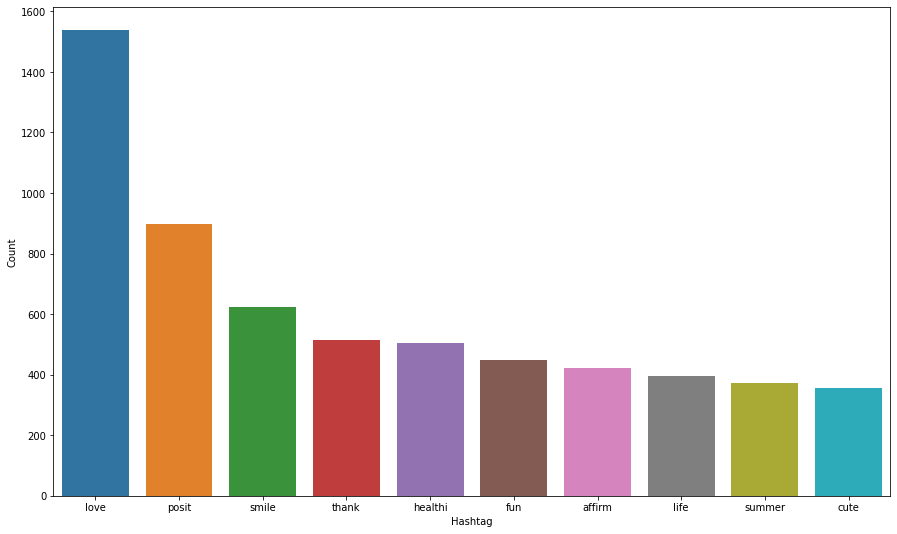

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

In [ ]:
freq = nltk.FreqDist(ht_negative)
d = pd.DataFrame({'Hashtag': list(freq.keys()),
                 'Count': list(freq.values())})
d.head()

,Hashtag,Count
0,cnncall,2
1,michiganmiddlschoolbuildwallchant,2
2,tcot,13
3,australia,5
4,opkillingbay,5


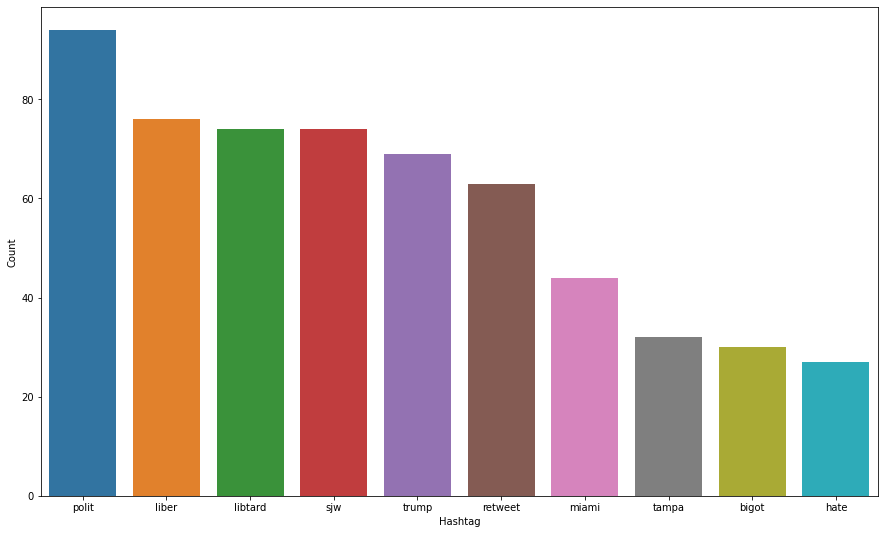

In [ ]:
# select top 10 hashtags
d = d.nlargest(columns='Count', n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d, x='Hashtag', y='Count')
plt.show()

Using SVM

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
x=df['clean_tweet']
y=df['label']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.5, random_state=55)
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [42]:
from sklearn import svm
#params = {'kernel':('linear', 'rbf'), 'C':[1, 10, 100]}
svcl = svm.SVC(kernel = 'rbf')
#clf_sv = GridSearchCV(svcl, params)
svcl.fit(X_train_vec, y_train)
svcl_score = svcl.score(X_test_vec, y_test)
print("Results for Support Vector Machine with tfidf")
print(svcl_score)


Results for Support Vector Machine with tfidf
0.9537575871347225


In [43]:
y_pred_sv = svcl.predict(X_test_vec)
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_sv = confusion_matrix(y_test, y_pred_sv)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_sv).ravel()
print(tn, fp, fn, tp)
tpr_sv = round(tp/(tp + fn), 4)
tnr_sv = round(tn/(tn+fp), 4)
print(tpr_sv, tnr_sv)

413 721 18 14829
0.9988 0.3642


## Logistic Regression

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state=45)
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [46]:
lr.fit(X_train_vec, y_train)
lr_score = lr.score(X_test_vec, y_test)
print("Results for Logistic Regression with tfidf")
print(lr_score)
y_pred_lr = lr.predict(X_test_vec)


Results for Logistic Regression with tfidf
0.9449971841561855


In [47]:
#Confusion matrix
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_pred_lr)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_lr).ravel()
print(tn, fp, fn, tp)
tpr_knn = round(tp/(tp + fn), 4)
tnr_knn = round(tn/(tn+fp), 4)
print(tpr_knn, tnr_knn)

267 856 23 14835
0.9985 0.2378
